# Kaggle Competition 1: Facebook recruiting iv robot vs human

In this my first kaggle competition, and it is alo the final project of my Udacity machine learning nano-degree. I choose this topic to firstly try to build my own data mining piplines for future work and Kaggle competitions, and also the data set could be handled with personal computers more easily.

In the following I will firstly describe the main goal of this competition, the data set and the evaluation metrics. Then, the procedures of exploring this challenge are presented. Finally we will make conclusion for this challenge. 

## 1. Problem Description

In this competition, we need to chase down the [robot bidders for an online auction site](https://www.kaggle.com/c/facebook-recruiting-iv-human-or-bot). On the auction site, the human bidders are easily get frustrated by facing their software-controlled counter part. And in order to stop the human customers base from plummeting, we need to build a model to indentify the computer generated biddings using the bidding data.

This is an classification problem, we need to classify if an bidding behavior is made by human or robot. 

## 2. Dataset

This data is from online plaform, and is inclusive of two datasets, the following description of dataset is directly from the [Kaggle competition set](https://www.kaggle.com/c/facebook-recruiting-iv-human-or-bot). One is a **bidder dataset** that includes a list of bidder information, including their id, payment account, and address. The other is a **bid dataset** that includes 7.6 million bids on different auctions, which are all made by mobile devices. 

Each bid has a fixed increment of dollar amount.

### 2.1 Data features

**For the bidder dataset**

| Features | Type | Description | 
| :-: | :-: | :-: | 
| bidder_id | nominal| Unique indentifier of a bidder. | 
| payment_account | nominal | Payment account associated with a bidder. These are obfuscated to protect privacy. | 
| address | nominal | Mailing address of a bidder. These are obfuscated to protect privacy. |

| label | Type | Description | 
| :-: | :-: | :-: |
| outcome | numerical | Label of a bidder indicating whether or not it is a robot. Value 1.0 indicates a robot, where value 0.0 indicates human.

The outcome was half hand labeled, half stats-based. There are two types of "bots" with different levels of proof:

- Bidders who are identified as bots/fraudulent with clear proof. Their accounts were banned by the auction site.

- Bidder who may have just started their business/clicks or their stats exceed from system wide average. There are no clear proof that they are bots. 

**For the bid dataset**

| Features | Type | Description | 
| :-: | :-: | :-: | 
| bid_id | nominal | unique id for this bid |
| bidder_id | nominal | Unique identifier of a bidder (same as the bidder_id used in train.csv and test.csv)|
| auction | nominal | Unique identifier of an auction |
| merchandise | nominal | The category of the auction site campaign, which means the bidder might come to this site by way of searching for "home goods" but ended up bidding for "sporting goods" - and that leads to this field being "home goods". This categorical field could be a search term, or online advertisement.|
|device|nominal|Phone model of a visitor|
|time|numerical| Time that the bid is made (transformed to protect privacy).|
|country|nominal|The country that the IP belongs to|
|ip|nominal|IP address of a bidder (obfuscated to protect privacy).|
|url|nominal|url where the bidder was referred from (obfuscated to protect privacy). |

## 3. Evalution metric

Submissions are evaluated on the area under the [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

The **recevier operating characteristic curve**, i.e. **ROC curve**, illustrates the diagnositic ability of a binary classifier system.

The ROC curve is created by plotting the **true positive rate**(TPR) against the **false positive rate**(FPR).

$TPR=\frac{True\quad Postive}{True\quad Positive+False\quad Negative}$

$FPR=\frac{False\quad Postive}{True\quad Negatve+False\quad Positive}$


## 4. Basic pipline

In order to engage this project, here is a preliminary thought about the pipline of problem solving, this pipline refered to the mini-projects of undacity nano-degree and the document "Beating Kaggle the easyway":

- 1-A relatively fast and intuitive feature exploration and engineering process will be performed.


- 2-With the features input, select 3-4 machine learning model that may be suitable (Adaboost, RandomForest, xgboost, etc), and conduct the training with their defaut parameters. From step 1 to 2, it should be as quickly as possible.


- 3-Compare the performance metrics for these machine learning models, the performance metrics could be: the training and predicting(on validation set) time consummation, Accurarcy score of training and valiation set, F-score of training and validation set.


- 4-Choose one promising model to perform further feature engineering and hyperparameter tuning. Hoping to iteratively improve the performance.


## 5. Data exploration

I noticed that the features of this dataset are mostly nominal types, which are also encoded for privacy concerns. This may imply the necessite of constructing the new features based on them, which may be more usable for feeding into the model. 


In [245]:
#import the necessary libary
import numpy as np
import pandas as pd

from time import time
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
import matplotlib.ticker as ticker
import pylab as pl
import math
import seaborn as sns
%matplotlib inline

sns.set(color_codes=True)
sns.set(style=None, palette="muted")

In [2]:
#read the csv file and take a glance of the data.
train_data=pd.read_csv('/Users/fx/.kaggle/competitions/facebook-recruiting-iv-human-or-bot/train.csv')
display(train_data.head(n=10))

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0
5,7eaefc97fbf6af12e930528151f86eb91bafh,a3d2de7675556553a5f08e4c88d2c228yory1,5a1d8f28bc31aa6d72bef2d8fbf48b967hra3,0.0
6,25558d24bca82beef0f9db4ba1fe2045ynnvq,81580585d4dedd473da11aabf37fe9d4e2s2n,9a6d81115b9b653ba326eb510e9163b47drqj,0.0
7,88ae7a35e374a6fddd079ebb28c822eeohwse,a3d2de7675556553a5f08e4c88d2c2289zref,3a7e6a32b24aeab0688e91a41f3188e22iuec,0.0
8,57db69e32163f3e486dc6ef7d615aa12usje6,bf1c3151cc309308077ad0ccb99779ad12apw,31b95425d178b89fd7306762bb48bfb5n04sj,0.0
9,d1be739798ba0745a1fd72ac918a9f1929hei,f49162ea9903fc00e4721d2f7972df9d6az4s,5b1f6e97a1cc27cd7fa9a3fe17eccd2a6mpdv,0.0


In [3]:
#label_data=train_data['outcome']
#train_data=train_data.drop('outcome',axis=1)

In [4]:
#read the csv file and take a glance of the data.
bid_data=pd.read_csv('/Users/fx/.kaggle/competitions/facebook-recruiting-iv-human-or-bot/bids.csv')

In [5]:
display(bid_data.head(n=10))

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3
6,6,eef4c687daf977f64fc1d08675c44444raj3s,kjlzx,mobile,phone2,9759243210526315,th,152.235.155.159,j9nl1xmo6fqhcc6
7,7,ab056855c9ca9d36390feae1fa485883issyg,f5f6k,home goods,phone8,9759243210526315,id,3.210.112.183,hnt6hu93a3z1cpc
8,8,d600dc03b11e7d782e1e4dae091b084a1h5ch,h7jjx,home goods,phone9,9759243210526315,th,103.64.157.225,vasstdc27m7nks3
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3


In [6]:
print('Total number of bidders in train data is:',train_data['bidder_id'].nunique())
print('Total number of bidders in bids data is:',bid_data['bidder_id'].nunique())
print('Total number of bidders in train data that are also in bids data:',bid_data.loc[bid_data['bidder_id'].isin(list(train_data['bidder_id']))]['bidder_id'].nunique())

Total number of bidders in train data is: 2013
Total number of bidders in bids data is: 6614
Total number of bidders in train data that are also in bids data: 1984


In [7]:
#How long does the bids record consist of?
time_series=set(bid_data['time'])

In [8]:
print('The total number of different timepoints: ',len(time_series))
print('The approximate duration of the bids data: ',len(time_series)/86400,' days.')

The total number of different timepoints:  776529
The approximate duration of the bids data:  8.987604166666667  days.


Since the each day has 86400s, 776529 times points may indicate a time duration of 9 days.

In [9]:
time_series=list(time_series)
max_tim_stmp=max(time_series)
min_tim_stmp=min(time_series)
sec_9days=86400
tot_tim_sec=len(time_series)
print('The maximum time stamp:',max_tim_stmp)
print('The minimum time stamp:',min_tim_stmp)
print('Total seconds of 9 days:',sec_9days)
print('Total seconds of bid record:',tot_tim_sec)


The maximum time stamp: 9772885210526315
The minimum time stamp: 9631916842105263
Total seconds of 9 days: 86400
Total seconds of bid record: 776529


In [83]:
def psi_cal(bench,compare,group):
    ben_len=len(bench)
    comp_len=len(compare)
    psi_cut=[]
    ben_pct_l=[]
    comp_pct_l=[]
    
    _,bins=pd.qcut(bench,group,labels=False,retbins=True,duplicates='drop')
    ben_bin=pd.DataFrame(np.array(range(len(bins))),index=bins[0:len(bins)])
    
    if len(ben_bin)<=2:
        #<
        ben_pct=len([b for b in bench if b<ben_bin.index[len(ben_bin)-1]+0.0])/ben_len
        comp_pct=len([c for c in compare if c<ben_bin.index[len(ben_bin)-1]+0.0])/comp_len
        try:
            psi_cut.append((comp_pct-ben_pct)*math.log(comp_pct/ben_pct))
        except (ValueError,ZeroDivisionError):
            psi_cut.append(float('nan'))
        
        ben_pct_l.append(ben_pct)
        comp_pct_l.append(comp_pct)
        
        #>=
        ben_pct=len([b for b in bench if b>=ben_bin.index[len(ben_bin)-1]+0.0])/ben_len
        comp_pct=len([c for c in compare if c>=ben_bin.index[len(ben_bin)-1]+0.0])/comp_len
        try:
            psi_cut.append((comp_pct-ben_pct)*math.log(comp_pct/ben_pct))
        except (ValueError,ZeroDivisionError):
            psi_cut.append(float('nan'))
        ben_pct_l.append(ben_pct)
        comp_pct_l.append(comp_pct)
        
    else:
        for i in range(1,len(ben_bin)):
            if i==1:
                ben_pct=len([b for b in bench if b<ben_bin.index[i]+0.0])/ben_len
                comp_pct=len([c for c in compare if c<ben_bin.index[i]+0.0])/comp_len
              
            
            elif i==len(ben_bin)-1:
                ben_pct=len([b for b in bench if b>=ben_bin.index[i-1]+0.0])/ben_len
                comp_pct=len([c for c in compare if c>=ben_bin.index[i-1]+0.0])/comp_len

            else:
                ben_pct=len([b for b in bench if b>=ben_bin.index[i-1]+0.0 and b<ben_bin.index[i]+0.0])/ben_len
                comp_pct=len([c for c in compare if c>=ben_bin.index[i-1]+0.0 and c<ben_bin.index[i]+0.0])/comp_len
            
            try:
                psi_cut.append((comp_pct-ben_pct)*math.log(comp_pct/ben_pct))
            except (ValueError,ZeroDivisionError):
                psi_cut.append(float('nan')) 
                
            ben_pct_l.append(ben_pct)
            comp_pct_l.append(comp_pct)
            
    df_report=pd.DataFrame(np.zeros([len(ben_bin)-1,4]),index=range(1,len(ben_bin)),columns=['bands','ben_pct','comp_pct','psi_cut'])
    
    bands=list(ben_bin.index)
    bands[0]=-99999999
    df_report['bands'],df_report['ben_pct'],df_report['comp_pct'],df_report['psi_cut']= \
    bands[0:len(bands)-1],ben_pct_l,comp_pct_l,psi_cut
    
    psi=round(sum(psi_cut),6)
    
    return df_report, psi
                
#psi calcuation for all the features                
def psi_f(features_list,benches,compares,group):
    psi_f={'feature':[],'psi_report':[],'psi':[]}
    for i in range(len(features_list)):
        psi_f['feature'].append(features_list[i])
        df,psi=psi_cal(benches[features_list[i]],compares[features_list[i]],group)
        psi_f['psi_report'].append(df)
        psi_f['psi'].append(psi)
    
    return psi_f

### Robots and Human data

In [10]:
#Extract the bids records of robots(outcome>0.5)
bots=train_data[(train_data.outcome>0.5)]
print('The total number of robots is',len(bots),'.')

bots_id=list(bots['bidder_id'])
bots_bids=bid_data.loc[bid_data['bidder_id'].isin(bots_id)]
display(bots_bids.head(n=10))

The total number of robots is 103 .


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
20,20,af9c96944265cf541b3fe734a057821a825l7,jtxiv,office equipment,phone19,9759243263157894,hr,144.100.75.92,vasstdc27m7nks3
36,36,52d8066e28f168e5bee769559ead307e1go7e,165y9,mobile,phone33,9759243315789473,us,240.205.85.43,azl6m5i5tg78c2j
47,47,46a28eaed47c29b4fd148a50cde44840u0bsn,5h9tv,mobile,phone44,9759243421052631,in,94.210.47.16,4efsnqzirqtxasm
55,55,b1863365ae232a316eb946ba56a29415m0gdz,c8cgg,home goods,phone4,9759243473684210,vn,208.207.224.110,vasstdc27m7nks3
107,107,e12177ff9c1a8413996f7b1a590980c82ofeo,fi8mh,sporting goods,phone81,9759243736842105,uk,91.53.170.204,457usxujudk2tc9
110,110,458c8c4e10e5c1b29e3fbe5ee56d46e8y3fb3,uj7b1,sporting goods,phone53,9759243736842105,my,149.125.177.230,vasstdc27m7nks3
157,157,d2704c8bb6ebbf13e08f37131382b126wy4yc,qcppg,mobile,phone91,9759244000000000,in,37.235.109.132,a9cftgqrt3utx0c
163,163,1cbd9081de4481ada66f1853737f7684ddjd1,8bm0x,computers,phone46,9759244000000000,nl,192.22.83.50,vasstdc27m7nks3
180,180,86e888c2dafacf13580a1211abf50961w6foa,2e9us,sporting goods,phone115,9759244157894736,sg,129.223.147.141,bcdxex1pzcjieq6
229,229,c2e1242ad5ea781923a08987d55365c69fii7,idfc3,jewelry,phone142,9759244368421052,ke,41.208.146.199,7dyu8bu1q8q68h9


In [11]:
#Extract the bids records of human(outcome<0.5)
human=train_data[(train_data.outcome<0.5)]
print('The total number of human is',len(human),'.')

human_id=list(human['bidder_id'])
human_bids=bid_data.loc[bid_data['bidder_id'].isin(human_id)]
display(human_bids.head(n=10))

The total number of human is 1910 .


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3
10,10,a58ace8b671a7531c88814bc86b2a34cf0crb,z6j8b,sporting goods,phone10,9759243210526315,ng,209.80.85.101,adgjz71s3p2oiau
13,13,7e34a26c4c339e875997f4b9239d2b5fscng4,nbx39,mobile,phone13,9759243263157894,in,143.183.225.33,e5i17pk9wygxewv
15,15,6c8ffec692e88d81e1b18d47818abb04v6llr,3pt0o,home goods,phone3,9759243263157894,id,220.216.170.202,l2585vww95sbk1c
19,19,37bf6f23b628a3e2b5b22ba81beccbef0efoh,qtmwx,jewelry,phone16,9759243263157894,in,67.52.51.193,r1pn2yun70umqqk
23,23,6c8ffec692e88d81e1b18d47818abb04v6llr,2yowp,home goods,phone20,9759243263157894,iq,140.231.164.76,s29w055z2b9jsyt
25,25,668d393e858e8126275433046bbd35c6tywop,38v0a,furniture,phone4,9759243315789473,bd,147.64.206.30,vasstdc27m7nks3
28,28,a58ace8b671a7531c88814bc86b2a34cf0crb,74uth,sporting goods,phone25,9759243315789473,ke,243.125.22.173,co51dtt0pyag991


### Bids number comparisons

PSI : 2.297879


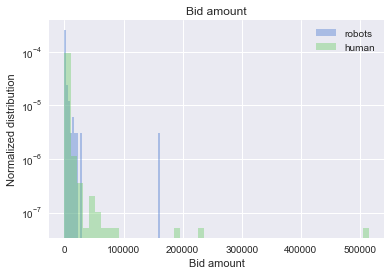

In [281]:
plt=sns.distplot(bots_bids.groupby(['bidder_id'])['bid_id'].count(),kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(human_bids.groupby(['bidder_id'])['bid_id'].count(),kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set_title('Bid amount')
plt.set(xlabel='Bid amount', ylabel='Normalized distribution')
plt.legend()

_,psi=psi_cal(bots_bids.groupby(['bidder_id'])['bid_id'].count(),human_bids.groupby(['bidder_id'])['bid_id'].count(),group=20)
print('PSI :', psi)


PSI : 1.527563


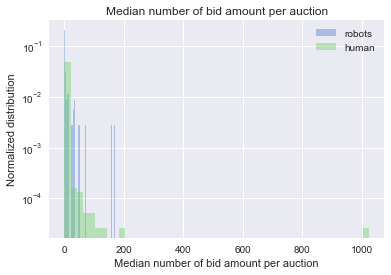

In [103]:
plt=sns.distplot(bots_bids.groupby(['bidder_id','auction'])['bid_id'].count().groupby('bidder_id').median(),kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(human_bids.groupby(['bidder_id','auction'])['bid_id'].count().groupby('bidder_id').median(),kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Median number of bid amount per auction', ylabel='Normalized distribution')
plt.set_title('Median number of bid amount per auction')
plt.legend()

_,psi=psi_cal(bots_bids.groupby(['bidder_id','auction'])['bid_id'].count().groupby('bidder_id').median(),human_bids.groupby(['bidder_id','auction'])['bid_id'].count().groupby('bidder_id').median(),group=20)
print('PSI :', psi)

PSI : 2.58223


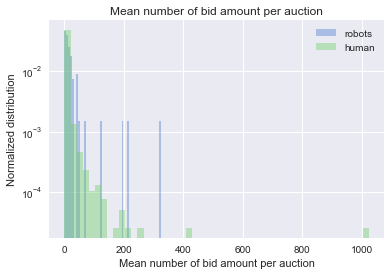

In [104]:
plt=sns.distplot(bots_bids.groupby(['bidder_id','auction'])['bid_id'].count().groupby('bidder_id').mean(),kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(human_bids.groupby(['bidder_id','auction'])['bid_id'].count().groupby('bidder_id').mean(),kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Mean number of bid amount per auction', ylabel='Normalized distribution')
plt.set_title('Mean number of bid amount per auction')
plt.legend()

_,psi=psi_cal(bots_bids.groupby(['bidder_id','auction'])['bid_id'].count().groupby('bidder_id').mean(),human_bids.groupby(['bidder_id','auction'])['bid_id'].count().groupby('bidder_id').mean(),group=20)
print('PSI :', psi)

PSI : 2.171151


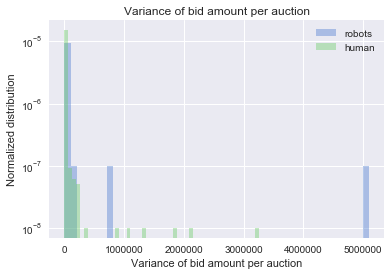

In [105]:
plt=sns.distplot(bots_bids.groupby(['bidder_id','auction'])['bid_id'].count().groupby('bidder_id').var().dropna(axis=0),kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(human_bids.groupby(['bidder_id','auction'])['bid_id'].count().groupby('bidder_id').var().dropna(axis=0),kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Variance of bid amount per auction', ylabel='Normalized distribution')
plt.set_title('Variance of bid amount per auction')
plt.legend()

_,psi=psi_cal(bots_bids.groupby(['bidder_id','auction'])['bid_id'].count().groupby('bidder_id').var(),human_bids.groupby(['bidder_id','auction'])['bid_id'].count().groupby('bidder_id').var(),group=20)
print('PSI :', psi)

### Bids number variation with time

In [106]:
bots_bids_tim_parttern=pd.DataFrame(bots_bids.sort_values(by=['time']).groupby(pd.cut(bots_bids['time'],500))['bid_id'].count().apply(lambda x:x/len(bid_data))).reset_index().drop(columns=['time']).rename(columns={'bid_id':'robot bid'})
human_bids_tim_parttern=pd.DataFrame(human_bids.sort_values(by=['time']).groupby(pd.cut(human_bids['time'],500))['bid_id'].count().apply(lambda x:x/len(bid_data))).reset_index().drop(columns=['time']).rename(columns={'bid_id':'human bid'})


Text(0.5,0.98,'Figure : Number of bids of both human and robot biders')

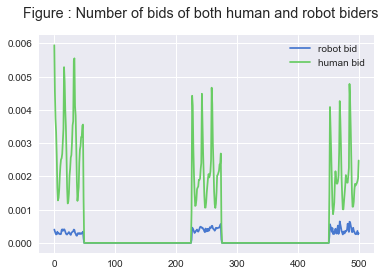

In [107]:
ax=bots_bids_tim_parttern.plot()
human_bids_tim_parttern.plot(ax=ax)

pl.suptitle('Figure : Number of bids of both human and robot biders')

PSI : 2.700249


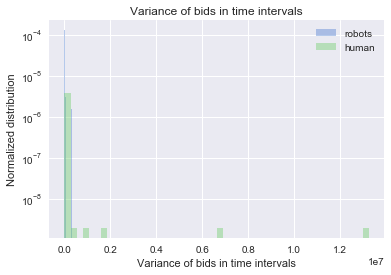

In [132]:
x1=bots_bids.sort_values(by=['time']).groupby(['bidder_id',pd.cut(bots_bids['time'],500)])['bid_id'].count().groupby('bidder_id').var().fillna(0)
x2=human_bids.sort_values(by=['time']).groupby(['bidder_id',pd.cut(human_bids['time'],500)])['bid_id'].count().groupby('bidder_id').var().fillna(0)

plt=sns.distplot(x1,kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(x2,kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Variance of bids in time intervals', ylabel='Normalized distribution')
plt.set_title('Variance of bids in time intervals')
plt.legend()

_,psi=psi_cal(x1,x2,group=20)
print('PSI :', psi)


### Devices comparisons

PSI : 0.552023


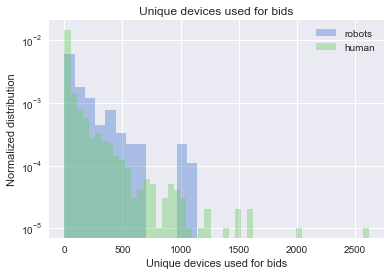

In [108]:
plt=sns.distplot(bots_bids.groupby('bidder_id')['device'].nunique(),kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(human_bids.groupby('bidder_id')['device'].nunique(),kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Unique devices used for bids', ylabel='Normalized distribution')
plt.set_title('Unique devices used for bids')
plt.legend()

_,psi=psi_cal(bots_bids.groupby('bidder_id')['device'].nunique(),human_bids.groupby('bidder_id')['device'].nunique(),group=20)
print('PSI :', psi)

PSI : 0.803566


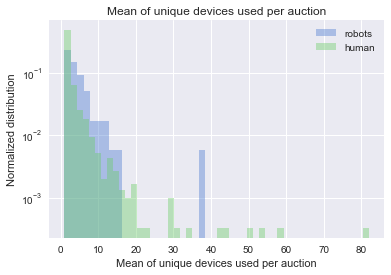

In [109]:
plt=sns.distplot(bots_bids.groupby(['bidder_id','auction'])['device'].nunique().groupby('bidder_id').mean(),kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(human_bids.groupby(['bidder_id','auction'])['device'].nunique().groupby('bidder_id').mean(),kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Mean of unique devices used per auction', ylabel='Normalized distribution')
plt.set_title('Mean of unique devices used per auction')
plt.legend()

_,psi=psi_cal(bots_bids.groupby(['bidder_id','auction'])['device'].nunique().groupby('bidder_id').mean(),human_bids.groupby(['bidder_id','auction'])['device'].nunique().groupby('bidder_id').mean(),group=20)
print('PSI :', psi)

PSI : 0.293959


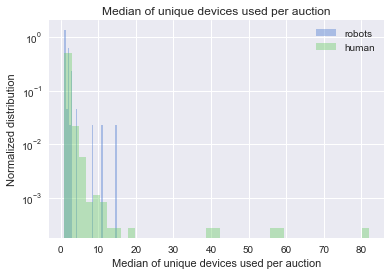

In [110]:
plt=sns.distplot(bots_bids.groupby(['bidder_id','auction'])['device'].nunique().groupby('bidder_id').median(),kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(human_bids.groupby(['bidder_id','auction'])['device'].nunique().groupby('bidder_id').median(),kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Median of unique devices used per auction', ylabel='Normalized distribution')
plt.set_title('Median of unique devices used per auction')
plt.legend()

_,psi=psi_cal(bots_bids.groupby(['bidder_id','auction'])['device'].nunique().groupby('bidder_id').median(),human_bids.groupby(['bidder_id','auction'])['device'].nunique().groupby('bidder_id').median(),group=20)
print('PSI :', psi)

PSI : 0.742612


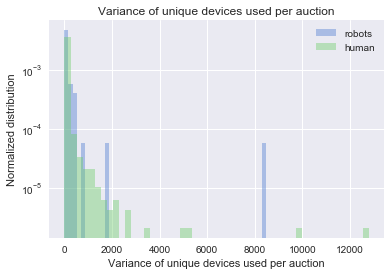

In [133]:
plt=sns.distplot(bots_bids.groupby(['bidder_id','auction'])['device'].nunique().groupby('bidder_id').var().fillna(0),kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(human_bids.groupby(['bidder_id','auction'])['device'].nunique().groupby('bidder_id').var().fillna(0),kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Variance of unique devices used per auction', ylabel='Normalized distribution')
plt.set_title('Variance of unique devices used per auction')
plt.legend()

_,psi=psi_cal(bots_bids.groupby(['bidder_id','auction'])['device'].nunique().groupby('bidder_id').var().fillna(0),human_bids.groupby(['bidder_id','auction'])['device'].nunique().groupby('bidder_id').var().fillna(0),group=20)
print('PSI :', psi)

### Urls 

PSI : 1.596673


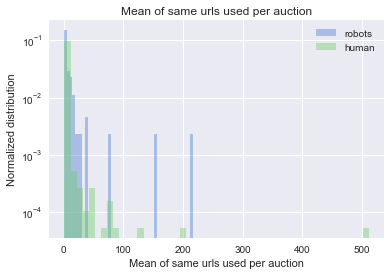

In [119]:
plt=sns.distplot(bots_bids.groupby(['bidder_id','auction','url'])['bid_id'].count().groupby('bidder_id').mean(),kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(human_bids.groupby(['bidder_id','auction','url'])['bid_id'].count().groupby('bidder_id').mean(),kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Mean of same urls used per auction', ylabel='Normalized distribution')
plt.set_title('Mean of same urls used per auction')
plt.legend()

_,psi=psi_cal(bots_bids.groupby(['bidder_id','auction','url'])['bid_id'].count().groupby('bidder_id').mean(),human_bids.groupby(['bidder_id','auction','url'])['bid_id'].count().groupby('bidder_id').mean(),group=20)
print('PSI :', psi)





PSI : 0.637968


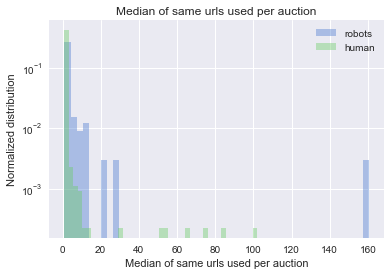

In [120]:
plt=sns.distplot(bots_bids.groupby(['bidder_id','auction','url'])['bid_id'].count().groupby('bidder_id').median(),kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(human_bids.groupby(['bidder_id','auction','url'])['bid_id'].count().groupby('bidder_id').median(),kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Median of same urls used per auction', ylabel='Normalized distribution')
plt.set_title('Median of same urls used per auction')
plt.legend()

_,psi=psi_cal(bots_bids.groupby(['bidder_id','auction','url'])['bid_id'].count().groupby('bidder_id').median(),human_bids.groupby(['bidder_id','auction','url'])['bid_id'].count().groupby('bidder_id').median(),group=20)
print('PSI :', psi)

PSI : 1.618563


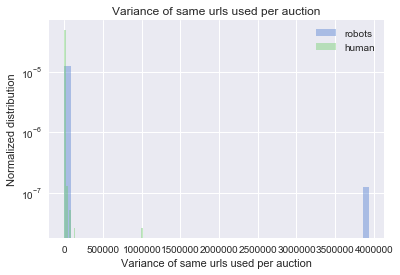

In [134]:
plt=sns.distplot(bots_bids.groupby(['bidder_id','auction','url'])['bid_id'].count().groupby('bidder_id').var().fillna(0),kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(human_bids.groupby(['bidder_id','auction','url'])['bid_id'].count().groupby('bidder_id').var().fillna(0),kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Variance of same urls used per auction', ylabel='Normalized distribution')
plt.set_title('Variance of same urls used per auction')
plt.legend()

_,psi=psi_cal(bots_bids.groupby(['bidder_id','auction','url'])['bid_id'].count().groupby('bidder_id').var().fillna(0),human_bids.groupby(['bidder_id','auction','url'])['bid_id'].count().groupby('bidder_id').var().fillna(0),group=20)
print('PSI :', psi)

### IPs

PSI : 1.527217


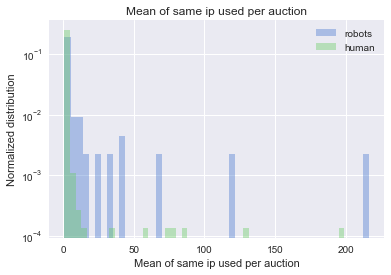

In [122]:
plt=sns.distplot(bots_bids.groupby(['bidder_id','auction','ip'])['bid_id'].count().groupby('bidder_id').mean(),kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(human_bids.groupby(['bidder_id','auction','ip'])['bid_id'].count().groupby('bidder_id').mean(),kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Mean of same ip used per auction', ylabel='Normalized distribution')
plt.set_title('Mean of same ip used per auction')
plt.legend()

_,psi=psi_cal(bots_bids.groupby(['bidder_id','auction','ip'])['bid_id'].count().groupby('bidder_id').mean(),human_bids.groupby(['bidder_id','auction','ip'])['bid_id'].count().groupby('bidder_id').mean(),group=20)
print('PSI :', psi)

PSI : 0.314173


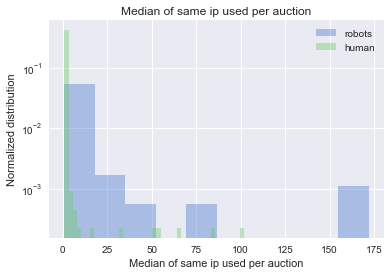

In [123]:
plt=sns.distplot(bots_bids.groupby(['bidder_id','auction','ip'])['bid_id'].count().groupby('bidder_id').median(),kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(human_bids.groupby(['bidder_id','auction','ip'])['bid_id'].count().groupby('bidder_id').median(),kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Median of same ip used per auction', ylabel='Normalized distribution')
plt.set_title('Median of same ip used per auction')
plt.legend()

_,psi=psi_cal(bots_bids.groupby(['bidder_id','auction','ip'])['bid_id'].count().groupby('bidder_id').median(),human_bids.groupby(['bidder_id','auction','ip'])['bid_id'].count().groupby('bidder_id').median(),group=20)
print('PSI :', psi)

PSI : 1.697147


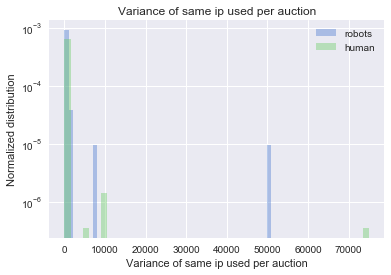

In [136]:
plt=sns.distplot(bots_bids.groupby(['bidder_id','auction','ip'])['bid_id'].count().groupby('bidder_id').var().fillna(0),kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(human_bids.groupby(['bidder_id','auction','ip'])['bid_id'].count().groupby('bidder_id').var().fillna(0),kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Variance of same ip used per auction', ylabel='Normalized distribution')
plt.set_title('Variance of same ip used per auction')
plt.legend()

_,psi=psi_cal(bots_bids.groupby(['bidder_id','auction','ip'])['bid_id'].count().groupby('bidder_id').var().fillna(0),human_bids.groupby(['bidder_id','auction','ip'])['bid_id'].count().groupby('bidder_id').var().fillna(0),group=20)
print('PSI :', psi)



###  Time intervals between bids

PSI : 0.746239


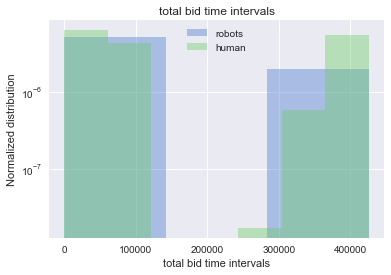

In [161]:
x1=bots_bids.sort_values(by=['bidder_id','time']).groupby(['bidder_id'])['time'].apply(lambda x: (max(x)-min(x))/(max_tim_stmp-min_tim_stmp)*tot_tim_sec)
x2=human_bids.sort_values(by=['bidder_id','time']).groupby(['bidder_id'])['time'].apply(lambda x: (max(x)-min(x))/(max_tim_stmp-min_tim_stmp)*tot_tim_sec)


plt=sns.distplot(x1,kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(x2,kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='total bid time intervals', ylabel='Normalized distribution')
plt.set_title('total bid time intervals')
plt.legend()

_,psi=psi_cal(x1,x2,group=20)
print('PSI :', psi)

PSI : 0.946881


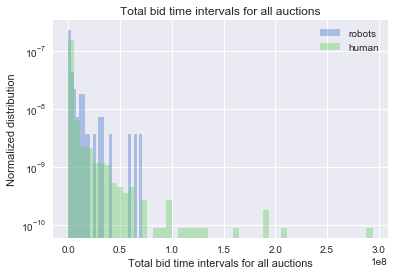

In [170]:
x1=bots_bids.sort_values(by=['bidder_id','auction']).groupby(['bidder_id','auction'])['time'].apply(lambda x:(max(x)-min(x))/(max_tim_stmp-min_tim_stmp)*tot_tim_sec).groupby('bidder_id').sum()
x2=human_bids.sort_values(by=['bidder_id','auction']).groupby(['bidder_id','auction'])['time'].apply(lambda x:(max(x)-min(x))/(max_tim_stmp-min_tim_stmp)*tot_tim_sec).groupby('bidder_id').sum()

plt=sns.distplot(x1,kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(x2,kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Total bid time intervals for all auctions', ylabel='Normalized distribution')
plt.set_title('Total bid time intervals for all auctions')
plt.legend()

_,psi=psi_cal(x1,x2,group=20)
print('PSI :', psi)

PSI : 1.298816


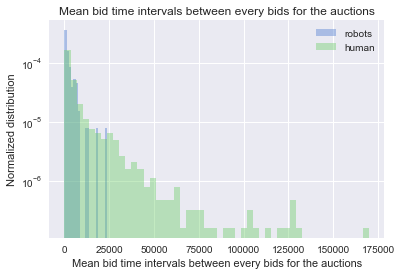

In [266]:
human_df=human_bids.sort_values(by=['bidder_id','auction'])
human_df['time_diff']=human_df.groupby(['bidder_id','auction'])['time'].diff().fillna(0).apply(lambda x:(x)/(max_tim_stmp-min_tim_stmp)*tot_tim_sec)

bots_df=bots_bids.sort_values(by=['bidder_id','auction'])
bots_df['time_diff']=bots_df.groupby(['bidder_id','auction'])['time'].diff().fillna(0).apply(lambda x:(x)/(max_tim_stmp-min_tim_stmp)*tot_tim_sec)


x1=bots_df.groupby('bidder_id')['time_diff'].mean()
x2=human_df.groupby('bidder_id')['time_diff'].mean()

plt=sns.distplot(x1,kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(x2,kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Mean bid time intervals between every bids for the auctions', ylabel='Normalized distribution')
plt.set_title('Mean bid time intervals between every bids for the auctions')
plt.legend()

_,psi=psi_cal(x1,x2,group=20)
print('PSI :', psi)

### Auctions

PSI : 2.172477


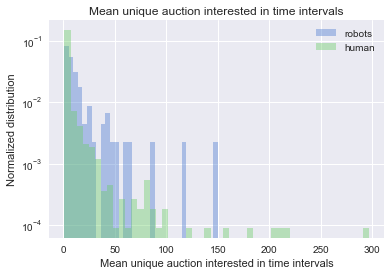

In [271]:
x1=bots_bids.sort_values(by=['time']).groupby(['bidder_id',pd.cut(bots_bids['time'],500)])['auction'].nunique().groupby('bidder_id').mean()
x2=human_bids.sort_values(by=['time']).groupby(['bidder_id',pd.cut(human_bids['time'],500)])['auction'].nunique().groupby('bidder_id').mean()

plt=sns.distplot(x1,kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(x2,kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='Mean unique auction interested in time intervals', ylabel='Normalized distribution')
plt.set_title('Mean unique auction interested in time intervals')
plt.legend()

_,psi=psi_cal(x1,x2,group=20)
print('PSI :', psi)

PSI : 0.959134


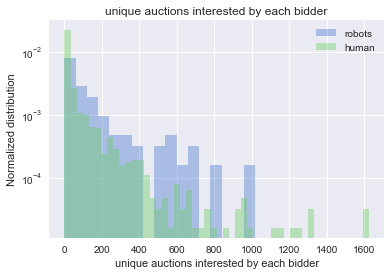

In [272]:
x1=bots_bids.groupby(['bidder_id'])['auction'].nunique()
x2=human_bids.groupby(['bidder_id'])['auction'].nunique()

plt=sns.distplot(x1,kde=False,norm_hist=True,hist_kws={'log':True},label='robots')
plt=sns.distplot(x2,kde=False,norm_hist=True,hist_kws={'log':True},label='human')
#plt.set_xscale('log')
plt.set(xlabel='unique auctions interested by each bidder', ylabel='Normalized distribution')
plt.set_title('unique auctions interested by each bidder')
plt.legend()

_,psi=psi_cal(x1,x2,group=20)
print('PSI :', psi)

### First, last and closed bids

In [232]:

auction_bid_time=pd.DataFrame(bid_data.groupby(['auction'])['time'].min()).rename(columns={'time':'min_tim'})
auction_bid_time['max_tim']=bid_data.groupby(['auction'])['time'].max()



In [233]:
bots_first_b=0
bots_final_b=0
bots_f_f_b=0

bots_bt=pd.DataFrame(bots_bids.groupby(['bidder_id','auction'])['time'].min()).rename(columns={'time':'min_tim'})
bots_bt['max_tim']=pd.DataFrame(bots_bids.groupby(['bidder_id','auction'])['time'].max()).rename(columns={'time':'min_tim'})



for bidder in bots_bids['bidder_id'].unique():
    for auction in bots_bids.loc[bots_bids['bidder_id']==bidder]['auction'].unique():
        #print(bots_bt.loc[(bidder,auction),'min_tim']==auction_bid_time.loc[auction,'min_tim'])
        if bots_bt.loc[(bidder,auction),'min_tim']==auction_bid_time.loc[auction,'min_tim'] and bots_bt.loc[(bidder,auction),'max_tim']!=auction_bid_time.loc[auction,'max_tim'] :
            bots_first_b+=1
        elif bots_bt.loc[(bidder,auction),'min_tim']!=auction_bid_time.loc[auction,'min_tim'] and bots_bt.loc[(bidder,auction),'max_tim']==auction_bid_time.loc[auction,'max_tim'] :
            bots_final_b+=1
        elif bots_bt.loc[(bidder,auction),'min_tim']==auction_bid_time.loc[auction,'min_tim'] and bots_bt.loc[(bidder,auction),'max_tim']==auction_bid_time.loc[auction,'max_tim'] :
            bots_f_f_b+=1
print(bots_first_b,bots_final_b,bots_f_f_b)

543 539 273


In [237]:
print(bots_first_b/len(bots_bids),bots_final_b/len(bots_bids),bots_f_f_b/len(bots_bids))




0.011687228429546866 0.011958798882681565 0.006529814556176288


In [236]:
human_first_b=0
human_final_b=0
human_f_f_b=0

human_bt=pd.DataFrame(human_bids.groupby(['bidder_id','auction'])['time'].min()).rename(columns={'time':'min_tim'})
human_bt['max_tim']=pd.DataFrame(human_bids.groupby(['bidder_id','auction'])['time'].max()).rename(columns={'time':'min_tim'})



for bidder in human_bids['bidder_id'].unique():
    for auction in human_bids.loc[human_bids['bidder_id']==bidder]['auction'].unique():
        #print(bots_bt.loc[(bidder,auction),'min_tim']==auction_bid_time.loc[auction,'min_tim'])
        if human_bt.loc[(bidder,auction),'min_tim']==auction_bid_time.loc[auction,'min_tim'] and human_bt.loc[(bidder,auction),'max_tim']!=auction_bid_time.loc[auction,'max_tim'] :
            human_first_b+=1
        elif human_bt.loc[(bidder,auction),'min_tim']!=auction_bid_time.loc[auction,'min_tim'] and human_bt.loc[(bidder,auction),'max_tim']==auction_bid_time.loc[auction,'max_tim'] :
            human_final_b+=1
        elif human_bt.loc[(bidder,auction),'min_tim']==auction_bid_time.loc[auction,'min_tim'] and human_bt.loc[(bidder,auction),'max_tim']==auction_bid_time.loc[auction,'max_tim'] :
            human_f_f_b+=1

print(human_first_b,human_final_b,human_f_f_b)

3280 3341 1705


In [238]:
print(human_first_b/len(human_bids),human_final_b/len(human_bids),human_f_f_b/len(human_bids))



0.0012336355238889006 0.0012565781357661027 0.0006412648073873706


Text(0.5,1,'')

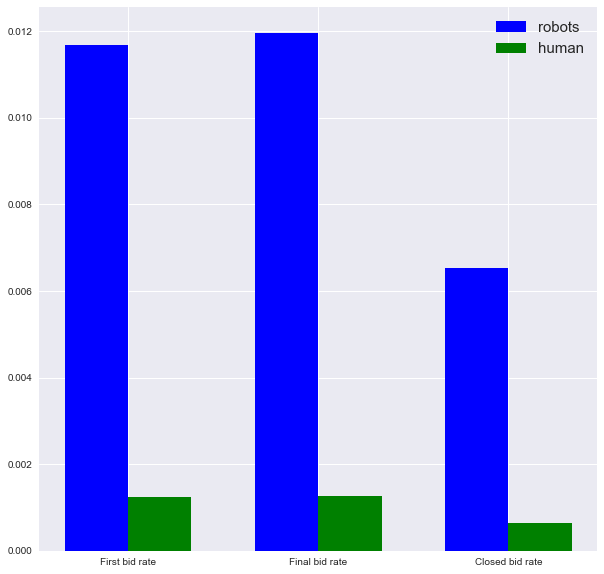

In [259]:
width=1
index=np.array([0,3,6])
plt.figure(figsize=(10,10))
plt.bar(index,(bots_first_b/len(bots_bids),bots_final_b/len(bots_bids),bots_f_f_b/len(bots_bids)),color='blue',label='robots',width=1)
plt.bar(index+width,(human_first_b/len(human_bids),human_final_b/len(human_bids),human_f_f_b/len(human_bids)),color='green',label='human',width=1)
plt.xticks(index + width/2, ('First bid rate', 'Final bid rate', 'Closed bid rate'),)
plt.xlabel('',fontsize=10)
plt.ylabel('',fontsize=20)
plt.legend(fontsize=15)
plt.title('',fontsize=30)

## Feature construction


- Mean number of bids for each auction by every bidder.
- Median number of bids for each auction by every bidder.
- Variance of bids for each auction by every bidder.
- Number of bids.
- Variance of bid amounts in time intervals


- Number of unique devices.
- Mean number of unique devices used for auctions by every bidder.


- Mean of same urls used per auction.
- Variance of same urls used per auction.
- Maximum number of diverse urls within all auctions by every bidder.


- Mean of same ip used per auction.
- Variance of same ip used per auction.


- Bids number in 9 time intervals by each bidder.
- Total bid time intervals for all auctions.
- Mean bid time intervals between every bids for the auctions.
- Total bid time periode (last bid time step- first bid time step) within all 9 days by every bidder.


- Mean unique auction interested in time intervals
- Unique auctions interested by each bidder

  

- First bid rate.
- Final bid rate.
- Closed(First and Final) bid rate.